#  Objective-based Customer Segmentation

Author: Yu-Cian Hong

### Business goal:
The goal of this analysis is to develop user segments and extract business insights to inform future marketing efforts and product development.

### Data:
Survey data (at end of 2018) & usage data (Aug 1- Nov 5, 2018) of app users.

### Instruction for running this code:
Python version: 3.6.1<br>
Jupyter Notebook version: 4.3.0<br>
Required python packages and versions:<br>
seaborn==0.7.1<br>
scikit-learn==0.21.3<br>
pandas==0.20.1<br>
numpy==1.17.2<br>
matplotlib==2.0.2<br>
imblearn==0.0<br>


In [1]:
# import python libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

# training algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


# training data prep
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn import preprocessing

# performace metrics
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, roc_curve,roc_auc_score, auc
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
import itertools


# jupyter notebook display settting
pd.set_option('display.max_colwidth', -1)
from IPython.display import Markdown, display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"    
import warnings
warnings.filterwarnings('ignore')

# Load data

In [2]:
# load survey and usage data
ds = pd.read_csv('survey_data.csv')
du = pd.read_csv('app_usage_data.csv')

In [3]:
# initial glimpse of survey data
ds.head(5)

,user_id,age,annual_income,country,duolingo_platform,duolingo_subscriber,duolingo_usage,employment_status,future_contact,gender,other_resources,primary_language_commitment,primary_language_review,primary_language_motivation,primary_language_motivation_followup,primary_language_proficiency,student,survey_complete,time_spent_seconds
0,35c9fc6e72c911e99681dca9049399ef,18-34,"$26,000 - $75,000",JP,Android phone or tablet,"No, I have never paid for Duolingo Plus",Daily,Employed full-time,Yes,Male,"Stories/novels/children's books,Movies/TV Shows",I'm very committed to learning this language.,I am using Duolingo to review a language I've studied before.,I like to learn new languages,"I want to learn as many languages as I can,Other (please specify)",Advanced,Not currently a student,1,193
1,35c9fdde72c911e98630dca9049399ef,18-34,"$26,000 - $75,000",JP,iPhone or iPad,"No, I have never paid for Duolingo Plus",Weekly,Employed full-time,Yes,Male,NaN,I'm slightly committed to learning this language.,I am using Duolingo to review a language I've studied before.,I need to be able to speak the local language where I live,"I am an immigrant,I am a refugee",Intermediate,Not currently a student,1,139
2,35c9feb072c911e9ab4cdca9049399ef,18-34,"$76,000 - $150,000",JP,iPhone or iPad,"Yes, I currently pay for Duolingo Plus",Daily,Employed full-time,Yes,Male,NaN,I'm moderately committed to learning this language.,I am using Duolingo to review a language I've studied before.,I want to connect with my heritage or identity,NaN,Beginner,Not currently a student,1,119
3,35c9ff7072c911e9900ddca9049399ef,18-34,"$76,000 - $150,000",JP,iPhone or iPad,"No, but I have previously paid for Duolingo Plus",Daily,Employed full-time,Yes,Female,Other apps,I'm very committed to learning this language.,I am using Duolingo to learn this language for the first time.,I am preparing for a trip,"I want to learn some basics in the local language,I have an upcoming trip",Intermediate,Not currently a student,1,229
4,35ca002672c911e99effdca9049399ef,35 - 54,"$76,000 - $150,000",JP,Android phone or tablet,"Yes, I currently pay for Duolingo Plus",Daily,Employed full-time,Yes,Male,NaN,I'm very committed to learning this language.,I am using Duolingo to learn this language for the first time.,I want to connect with my heritage or identity,NaN,Intermediate,Not currently a student,1,157


In [4]:
# initial glimpse of usage data
du.head(5)

,user_id,duolingo_start_date,daily_goal,highest_course_progress,took_placement_test,purchased_subscription,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,longest_streak,n_days_on_platform
0,35cb7e8f72c911e9888edca9049399ef,6/20/18 21:14,NaN,46.0,True,False,277.0,88,741.0,668.0,135,137
1,35ca34fd72c911e99ed6dca9049399ef,8/8/17 5:01,NaN,50.0,True,False,62.0,16,57.0,57.0,6,453
2,35d1a54a72c911e98e25dca9049399ef,10/15/14 17:55,1.0,71.0,False,False,202.0,29,315.0,295.0,55,1481
3,35d4beb072c911e9aa92dca9049399ef,10/5/18 9:28,NaN,2.0,False,False,2.0,3,6.0,5.0,1,30
4,35ccf4bd72c911e9be2edca9049399ef,9/17/15 3:16,NaN,34.0,False,False,216.0,57,338.0,297.0,56,1144


survey data summary:

In [5]:
# survey data summary
print("unique users:",ds.user_id.nunique(),'\n')
ds.info()

unique users: 6150 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6187 entries, 0 to 6186
Data columns (total 19 columns):
user_id                                 6187 non-null object
age                                     5838 non-null object
annual_income                           5182 non-null object
country                                 6187 non-null object
duolingo_platform                       5911 non-null object
duolingo_subscriber                     5901 non-null object
duolingo_usage                          5911 non-null object
employment_status                       5730 non-null object
future_contact                          5446 non-null object
gender                                  5838 non-null object
other_resources                         4474 non-null object
primary_language_commitment             6022 non-null object
primary_language_review                 6014 non-null object
primary_language_motivation             5948 non-null object
primary_language_m

drop duplicated user data:

In [6]:
ds.drop_duplicates(subset=['user_id'],inplace=True)

In [7]:
# usage data summary
print("unique users:",du.user_id.nunique(),'\n')
du.info()

unique users: 6114 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6149 entries, 0 to 6148
Data columns (total 12 columns):
user_id                    6149 non-null object
duolingo_start_date        6149 non-null object
daily_goal                 2687 non-null float64
highest_course_progress    6135 non-null float64
took_placement_test        6135 non-null object
purchased_subscription     6149 non-null bool
highest_crown_count        5857 non-null float64
n_active_days              6149 non-null int64
n_lessons_started          5993 non-null float64
n_lessons_completed        5993 non-null float64
longest_streak             6149 non-null int64
n_days_on_platform         6149 non-null int64
dtypes: bool(1), float64(5), int64(3), object(3)
memory usage: 534.5+ KB


drop duplicated user data:

In [8]:
du.drop_duplicates(subset=['user_id'],inplace=True)

The two data sets are curated for the same group of users, so merge them (inner join on user id):

In [9]:
# inner join two data sets on user id
df = pd.merge(du,ds,how='inner',on='user_id')

# Data summary 

In [10]:
df.shape

(6079, 30)

#### In total, there are 6079 unique users and 30 attributes.

Attributes, number of non-null entries, and data format:

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6079 entries, 0 to 6078
Data columns (total 30 columns):
user_id                                 6079 non-null object
duolingo_start_date                     6079 non-null object
daily_goal                              2648 non-null float64
highest_course_progress                 6065 non-null float64
took_placement_test                     6065 non-null object
purchased_subscription                  6079 non-null bool
highest_crown_count                     5787 non-null float64
n_active_days                           6079 non-null int64
n_lessons_started                       5923 non-null float64
n_lessons_completed                     5923 non-null float64
longest_streak                          6079 non-null int64
n_days_on_platform                      6079 non-null int64
age                                     5736 non-null object
annual_income                           5091 non-null object
country                                

In [12]:
print('%4.2f' % (df[df['purchased_subscription']==True].shape[0]/df.shape[0]))

0.32


#### Fraction of users that has purchased subscription: 32%.

# Preprocessing
### data cleaning, handling incomplete data, reformatting

Below is an overview of the data, showing data attributes vs. number of non-null entries

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6079 entries, 0 to 6078
Data columns (total 30 columns):
user_id                                 6079 non-null object
duolingo_start_date                     6079 non-null object
daily_goal                              2648 non-null float64
highest_course_progress                 6065 non-null float64
took_placement_test                     6065 non-null object
purchased_subscription                  6079 non-null bool
highest_crown_count                     5787 non-null float64
n_active_days                           6079 non-null int64
n_lessons_started                       5923 non-null float64
n_lessons_completed                     5923 non-null float64
longest_streak                          6079 non-null int64
n_days_on_platform                      6079 non-null int64
age                                     5736 non-null object
annual_income                           5091 non-null object
country                                

## missing value
(1) daily_goal: from the cell above, more than 50% of users are without daily_goal. It's likely they didn't set their goals. Daily goal is a numerical parameter, so fill NaN with 0.

In [14]:
# daily_goal: fill NaN with 0
df['daily_goal'].fillna(0,inplace=True);

(2) Missing data in other columns can't be inferred. If the particular data column is needed for modeling, the data rows with missing value will be dropped based on the column. Otherwise, the data column will be dropped instead, in order to keep as many data entries as possible. Further inspection of the data content will help make informed decisions later. Correlation between data can also help drop unecessary data columns.

## dropping  data

(1) drop incomplete survey:

A small fraction (7%) of survey data is incomplete.
They are dropped from further analysis.

In [15]:
# fraction of complete/incomplete survey
df['survey_complete'].value_counts(normalize=True)

# drop incomplete survey
df = df[df['survey_complete']==1]

1    0.925481
0    0.074519
Name: survey_complete, dtype: float64

(2) user_id: 

Row index is enough for identifying each unique user,so drop user_id

In [16]:
df.drop('user_id',axis=1,inplace=True);

(3) duolingo_subscriber: 

This is redundant. Keep only "purchased_subscription" column from usage data, which is more reliable.

In [17]:
df.drop('duolingo_subscriber',axis=1,inplace=True);

(4) survey_complete & time_spent_seconds

From the 100 smallest survey time duration, it seems likely negative time duration just have an extra negative sign by formatting failure.
The smallest time duration is 68s, which seems reasonable, so survey_complete column is dropped, and all completed survey data are considered valid.

In [18]:
# 100 smallest survey time spent
df[df.survey_complete==1].time_spent_seconds.nsmallest(100)

# drop survey_complete & time_spent_seconds column
df.drop('survey_complete',axis=1,inplace=True);
df.drop('time_spent_seconds',axis=1,inplace=True);

(5) Missing values:

Missing values are dropped for parameters that are needed in correlation analysis and modeling, based on later exploratory data analysis.

In [19]:
# drop rows with missing values
df.dropna(subset=['student'],inplace=True)
df.dropna(subset=['gender'],inplace=True)
df.dropna(subset=['took_placement_test'],inplace=True)
df.dropna(subset=['duolingo_usage'],inplace=True)
df.dropna(subset=['primary_language_commitment'],inplace=True)

### Reformatting data
Transform "duolingo_start_date" to "user_life". 
"user_life" = 0 yr for users starting in 2018:

In [20]:
# transform duolingo_start_date to datetime format
df['duolingo_start_date']=pd.to_datetime(df['duolingo_start_date'])

# add start_year column
df['start_year'] = df['duolingo_start_date'].dt.year

print ("duolingo_start_date range:", df['duolingo_start_date'].dt.date.min(),' -> ', df['duolingo_start_date'].dt.date.max())

# transform start_year to user_life
f = lambda x:2018-x
df['user_life'] = df['start_year'].apply(f)
df.drop('start_year',axis=1,inplace=True);
df.drop('duolingo_start_date',axis=1,inplace=True);

duolingo_start_date range: 2012-04-07  ->  2018-11-02


In [21]:
# transform pointer object to string type
df['primary_language_commitment'] = df['primary_language_commitment'].astype(str)
df['gender'] = df['gender'].astype(str)
df['student'] = df['student'].astype(str)
df['duolingo_usage'] = df['duolingo_usage'].astype(str)

Shorten long column names:

In [22]:
df.rename(columns={'employment_status':'emp','annual_income':'income','duolingo_platform':'platform',
                    'primary_language_commitment':'commitment','primary_language_proficiency':'proficiency',
                   'purchased_subscription':'subscriber'},inplace=True)

### Inspect each parameter
This overview double checks that each data columns do not contain odd values. It will also be useful for feature engineering in the later section.
1. categorical parameters

All values in categorical parameters seem reasonable. Some parameters are dropped because they are hard to quantify or contain too many categories that may complicate the model.

In [23]:
# divide paramters into categorical and continuous 

categor = list(df.columns)

# continuous parameters
contin = [
 'user_life',
 'daily_goal',
 'highest_course_progress',
 'highest_crown_count',
 'n_active_days',
 'n_lessons_started',
 'n_lessons_completed',
 'longest_streak',
 'n_days_on_platform'
]

other=[
     'other_resources',
     'primary_language_motivation_followup']

rm = contin+other

#  remove non-categorical parameters
for item in rm:
    categor.remove(item)

Inspect catergorial parameters:

In [24]:
# inspect catergorial parameters
print('Catergorical parameters: values vs. fraction\n')
for col in categor[2:]:
    print('\n',col,':\n',df[col].value_counts(normalize=True))

Catergorical parameters: values vs. fraction


 age :
 35 - 54        0.351974
18-34          0.321557
55 - 74        0.248063
Under 18       0.057623
75 or older    0.020782
Name: age, dtype: float64

 income :
 $0 - $10,000          0.352806
$26,000 - $75,000     0.277905
$11,000 - $25,000     0.191529
$76,000 - $150,000    0.114125
$151,000 or more      0.063634
Name: income, dtype: float64

 country :
 JP    0.155560
MX    0.150651
FR    0.146120
RU    0.115537
GB    0.108741
DE    0.097414
US    0.072683
BR    0.060600
CO    0.047385
TW    0.045309
Name: country, dtype: float64

 platform :
 Android phone or tablet    0.444277
iPhone or iPad             0.418020
Web browser                0.137703
Name: platform, dtype: float64

 duolingo_usage :
 Daily                     0.737776
Weekly                    0.180668
Monthly                   0.049273
Less than once a month    0.027752
I don't use Duolingo      0.004531
Name: duolingo_usage, dtype: float64

 emp :
 Employed full-ti

In [25]:
# drop: too complicated to quantify and may complicates analysis
df.drop('primary_language_review',axis=1,inplace=True);
df.drop('primary_language_motivation',axis=1,inplace=True);
df.drop('primary_language_motivation_followup',axis=1,inplace=True);
df.drop('other_resources',axis=1,inplace=True);
categor.remove('primary_language_review')
categor.remove('primary_language_motivation')

2\. Numerical parameters

Inspect continuous/numerical parameters:

highest_course_progress contains negative values. It will be dropped because it is highly correlated with other engagement parameters.

In [26]:
# inspect continuous parameters
for col in contin:
    print(col,': ',df[col].min(),' to ',df[col].max())

user_life :  0  to  6
daily_goal :  0.0  to  50.0
highest_course_progress :  -10.0  to  83.0
highest_crown_count :  0.0  to  617.0
n_active_days :  1  to  289
n_lessons_started :  1.0  to  3902.0
n_lessons_completed :  0.0  to  3880.0
longest_streak :  0  to  6000
n_days_on_platform :  2  to  2402


# Exploratory Data Analysis
Analyze behavior and demographics of two major customer segments: subscriber and non-subscriber.

In [27]:
dsub = df[df['subscriber']==True]
dnon = df[df['subscriber']==False]

### (1) Categorical parameters

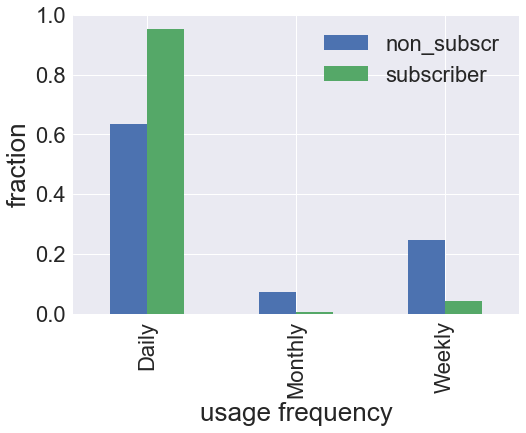

In [28]:
# summarize duolingo usage data
s1 = dsub['duolingo_usage'].value_counts(normalize=True).sort_index()
subscriber = list(s1)
s2 = dnon['duolingo_usage'].value_counts(normalize=True).sort_index()
not_ = list(s2)
index = s1.index
dtmp = pd.DataFrame({'non_subscr': not_,'subscriber': subscriber}, index=index)
dtmp.drop('I don\'t use Duolingo',inplace=True)
dtmp.drop('Less than once a month',inplace=True)

# plot
ax = dtmp.plot.bar(fontsize=22)
l = plt.legend(fontsize=22)
x = plt.xlabel('usage frequency', fontsize=26)
y = plt.ylabel('fraction', fontsize=26)
t = plt.tick_params(axis='both', labelsize=22)
v = plt.savefig('usage.eps', bbox_inches='tight', dpi=600) 
sh = plt.show()

#### Usage frequency is distinctly different between the two groups. An extremely high fraction of subscribers use Duolingo daily.

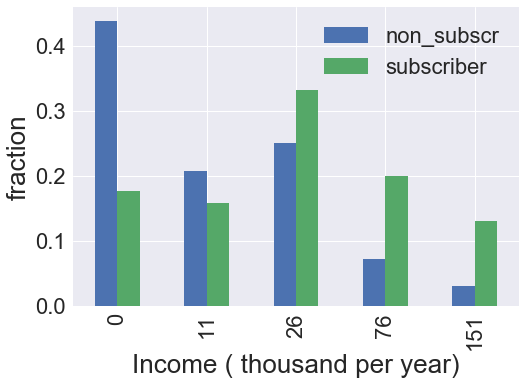

In [29]:
s1 = dsub['income'].value_counts(normalize=True).sort_index()
subscriber = list(s1)
s2 = dnon['income'].value_counts(normalize=True).sort_index()
not_ = list(s2)
index = s1.index
dtmp = pd.DataFrame({'subscriber': subscriber,
                   'non_subscr': not_}, index=index)




dtmp.rename(index={'$0 - $10,000':0,'$11,000 - $25,000':11,'$151,000 or more':151,
                    '$26,000 - $75,000':26,'$76,000 - $150,000':76},inplace=True)

dtmp.sort_index(inplace=True)
ax = dtmp.plot.bar(fontsize=22)
l = plt.legend(fontsize=22)
x = plt.xlabel('Income ( thousand per year)', fontsize=26)
y = plt.ylabel('fraction', fontsize=26)
t = plt.tick_params(axis='both', labelsize=22)
v = plt.savefig('income.eps', bbox_inches='tight', dpi=600) 
sh = plt.show()

#### The highest two income groups tend to have more subscribers, and the lowest income group has the majority of non-subscribers. Income is a key attribute that segment customers.

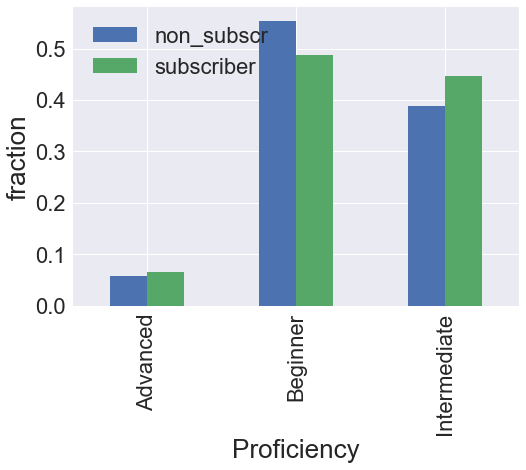

In [30]:
s1 = dsub['proficiency'].value_counts(normalize=True).sort_index()
subscriber = list(s1)
s2 = dnon['proficiency'].value_counts(normalize=True).sort_index()
not_ = list(s2)
index = s1.index
dtmp = pd.DataFrame({'subscriber': subscriber,
                   'non_subscr': not_}, index=index)
ax = dtmp.plot.bar(fontsize=22)
l = plt.legend(fontsize=22)
x = plt.xlabel('Proficiency', fontsize=26)
y = plt.ylabel('fraction', fontsize=26)
t = plt.tick_params(axis='both', labelsize=22)

 

sh = plt.show()




#### Intermediate users are a bit more likely to subscribe than beginners. Advanced learners suffer a super low subscription rate in both groups.

<br>Inspect numerical/continuous parameters for SUBSCRIBERS:

### (1) Numerical parameters

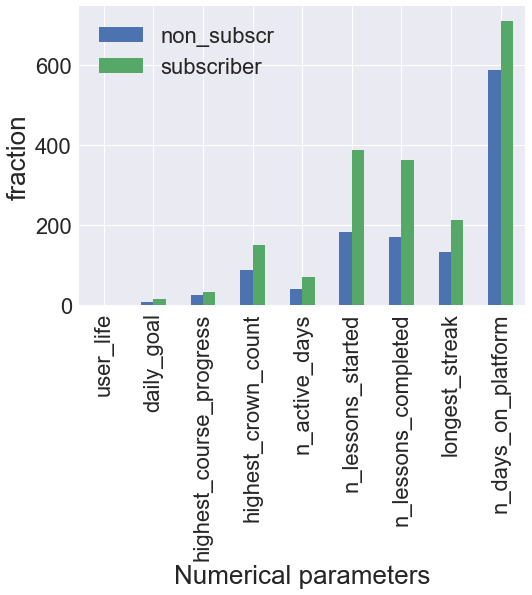

In [31]:
stmp = []
for col in contin:
    stmp.append(round(dsub[col].mean()))

ntmp = []
for col in contin:
    ntmp.append(round(dnon[col].mean()))

dtmp = pd.DataFrame({'subscriber': stmp,
                   'non_subscr': ntmp}, index=contin)


ax = dtmp.plot.bar(fontsize=22)
l = plt.legend(fontsize=22)
x = plt.xlabel('Numerical parameters', fontsize=26)
y = plt.ylabel('fraction', fontsize=26)
t = plt.tick_params(axis='both', labelsize=22)



plt.show()

#### The mean values of numerical parameters for subscribers and non-subscribers seem distinctly different.

# Feature engineering
Turn categorical features into ordinal or one-hot encoded representations, for correlation analysis and machine learning modeling.

In [32]:
df_eng = df.copy()

In [33]:
# subscriberpurchased_subscription - 0: False  1:True
df_eng.loc[df_eng['subscriber']==True,'subscriber'] = 1.
df_eng.loc[df_eng['subscriber']==False,'subscriber'] = 0.

# took_placement_test - 0: False  1:True
df_eng.loc[df_eng['took_placement_test']==True,'took_placement_test'] = 1.
df_eng.loc[df_eng['took_placement_test']==False,'took_placement_test'] = 0.
df_eng['took_placement_test'] = df_eng['took_placement_test'].astype(float)


# future contact - 0: False  1:True
df_eng.loc[df_eng['future_contact']=='Yes','future_contact'] = 1.
df_eng.loc[df_eng['future_contact']=='No','future_contact'] = 0.
df_eng['future_contact'] = df_eng['future_contact'].astype(float)


# usage - 0: non-daily  1:daily
df_eng.loc[df_eng['duolingo_usage']!='Daily','duolingo_usage'] = 0.
df_eng.loc[df_eng['duolingo_usage']=='Daily','duolingo_usage'] = 1.
df_eng['duolingo_usage'] = df_eng['duolingo_usage'].astype(float)


# student status -  0:not student   1:student
df_eng.loc[df_eng['student']=='Not currently a student','student'] = 0.
df_eng.loc[df_eng['student']=='Full-time student','student'] = 1.
df_eng.loc[df_eng['student']=='Part-time student','student'] = 1.
df_eng['student'] = df_eng['student'].astype(float)


# drop genders other than female and male (2% of total)
df_eng = df_eng[~((df_eng.gender=='Prefer not to say')|(df_eng.gender=='Other'))]

# language commitment -> ordinal : 0, 0.5, 1
df_eng.loc[df_eng['commitment']=='I\'m extremely committed to learning this language.','commitment'] = 1.
df_eng.loc[df_eng['commitment']=='I\'m very committed to learning this language.','commitment'] = 1.
df_eng.loc[df_eng['commitment']=='I\'m moderately committed to learning this language.','commitment'] = .5
df_eng.loc[df_eng['commitment']=='I\'m slightly committed to learning this language.','commitment'] = 0.
df_eng.loc[df_eng['commitment']=='I\'m not at all committed to learning this language.','commitment'] = 0.
df_eng['commitment'] = df_eng['commitment'].astype(float)


# gender - 0:male  1:female
df_eng.loc[df_eng['gender']=='Female','gender'] = 1.
df_eng.loc[df_eng['gender']=='Male','gender'] = 0.
df_eng['gender'] = df_eng['gender'].astype(float)


# turn categorical parameters into one hot encoded vector
# for this data, age & income are better treated as one-hot encoded than ordinal.
one_hot = ['country','student','age','income','emp','platform','proficiency']
tmp1 = pd.get_dummies(df_eng[one_hot])
df_model = pd.concat([df_eng,tmp1], axis=1)
df_model.drop(one_hot,axis = 1,inplace=True)

# Data correlations

### 1. Categorical parameters

correlation: categorical parameters


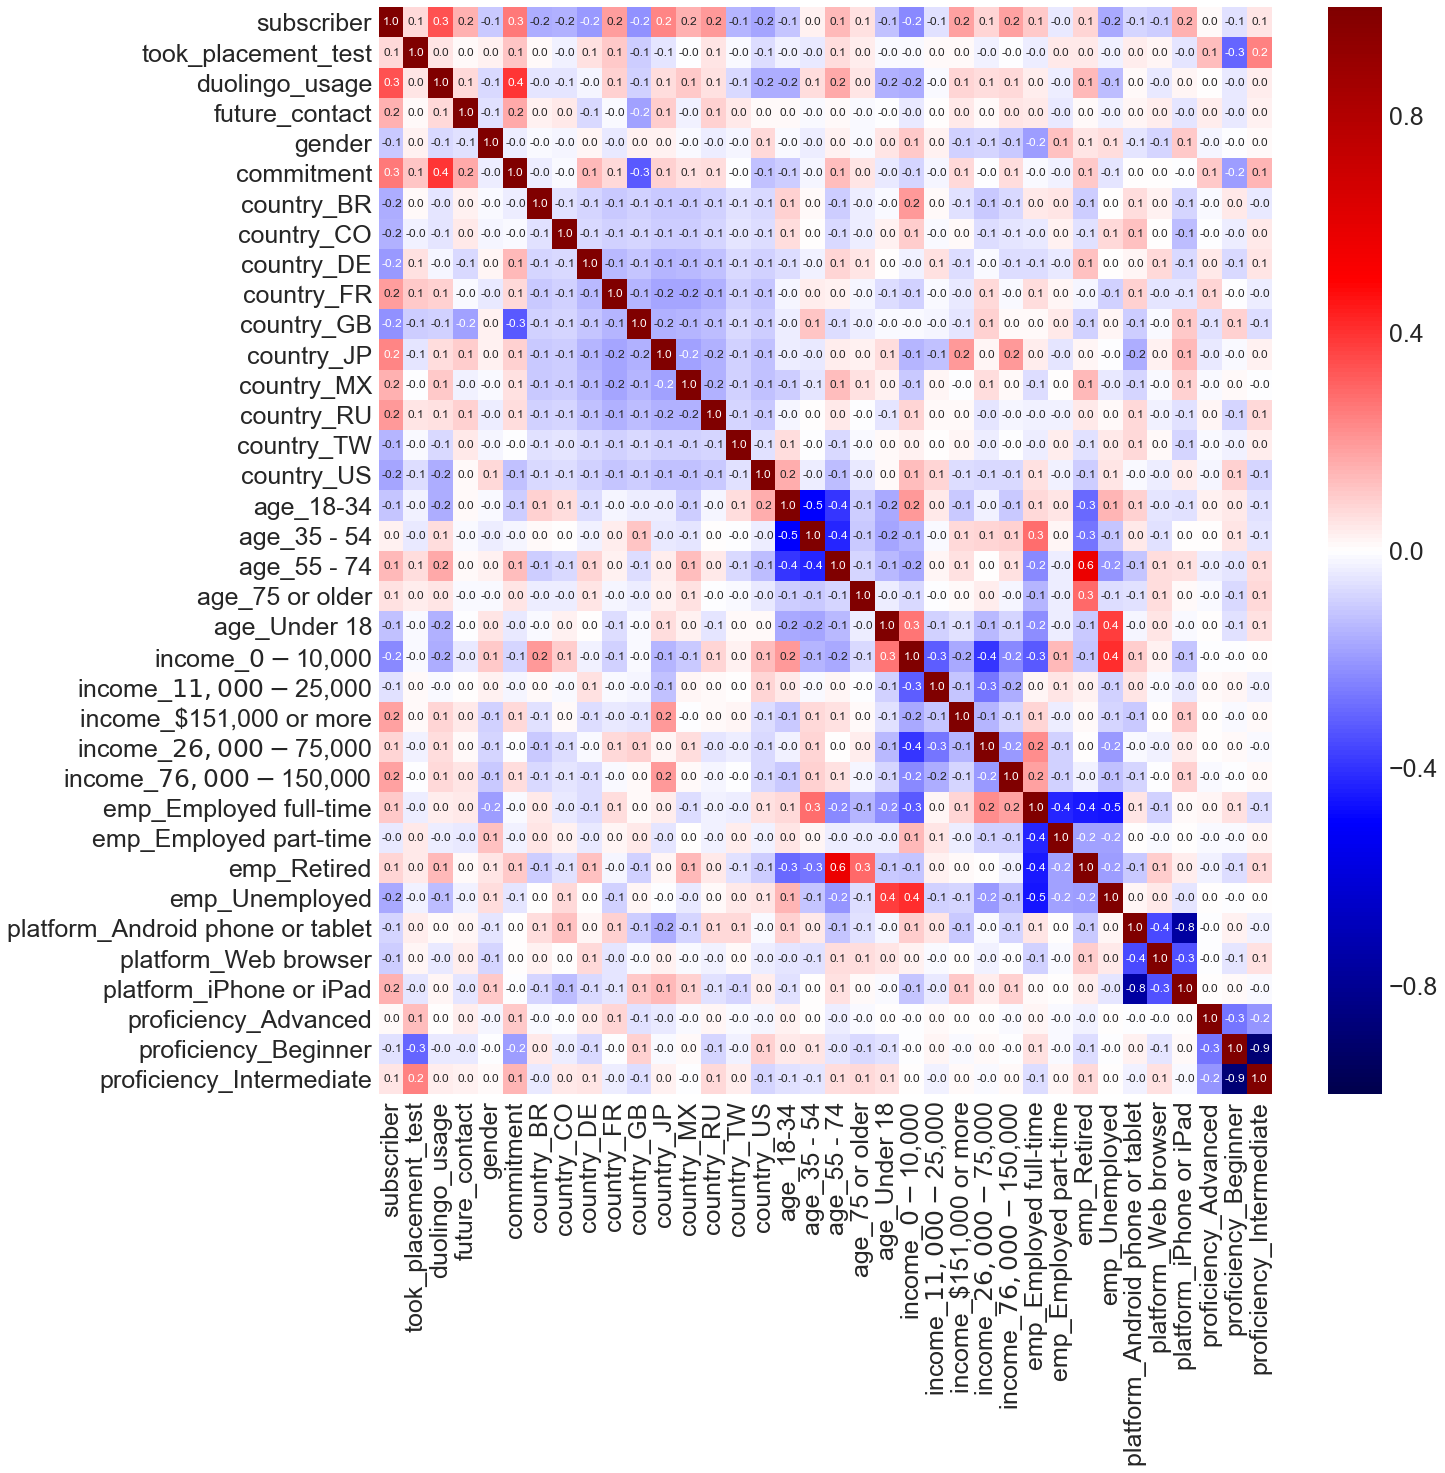

In [34]:
# data with only continuous parameters

categ = list(df_model.columns)

for item in contin:
        categ.remove(item)

tmp = categ[0] 
categ[0] = categ[1]  
categ[1] = tmp

df_categ = df_model[categ]

# plot correlation map for categorical/ordinal parameters
print("correlation: categorical parameters")
sns.set(style="whitegrid", rc={
            'figure.figsize': (20, 20),
            'axes.titlesize': 24,
            'axes.labelsize': 22,
            'xtick.labelsize': 25,
            'ytick.labelsize': 25})
a = sns.heatmap(data=df_categ.corr(), cmap="seismic", annot=True,fmt='.1f')
plt.savefig("corr1.eps", bbox_inches='tight', dpi=600)

plt.show();

Rich business insights can be inferred in the above correlation matrix. It contains key insights for customer segmentation in its first column, based on subscription rate (“subscriber”) as the business objective. The first column shows 5 major categories of parameters that can best segment customers and provide valuable insights for product development and business decision:

(1) engagement <br>
(2) social economical status <br>
(3) device <br>
(4) language proficiency <br>
(5) country

(1)engagement:
    
“duolingo_usage” (daily: 1, non-daily:0) stands out as the most positively correlated with user subscription rate.
Developing tools that engages user more frequently may increase subscription. For more detail, please refer to the submitted pdf writeup.

(2) social economical status:

Age, income, employment status segment users, and they are correlated. Lumping all three parameters together
, users under 34 have less financial capability to subscribe, and users above 55 have more time and money to
subscribe and make use of it.
Marketing and product development tailored to each group can create great business value.


(3) device:

iOS users have more subscribers. It can be relevant to the parameters in group (1) and (2), or can imply that enhancing user experience on the Android platform is worth pursuing.

(4) language proficiency:

Intermediate language learners are more engaged than beginners. This implies more usage or learning commitment enhances subscription rate. However, advanced learners are not more engaged than intermediate learners.
Developing the advanced learners's market can create new business value.

(5) countries:

Countries that are similar linguistically and geographically to countries with more subscribers (France, Mexico,..) can have good market potential. 
Beyond the correlation matrix, Taiwan is the 8th top user and advertising can relatively seamlessly extend the market development effort in China to Taiwan.
Summing up all the segmentation parameters here, an interesting insight is to do customer targeting in Japan. Japan has the most subscribed users and highest incomes. There are more iOS subscribers than Android. Developing the market for Android users may create new business value.


### 2. Numerical parameters

Numerical parameters mainly belong to the user usage/engagement catergory. And subscription is very correlated with usage. Usage parameters are often highly correlated with each other. For modeling, most of these features can be represented by a few or a single parameter (ie. duolingo_usage).

correlation: continuous parameters


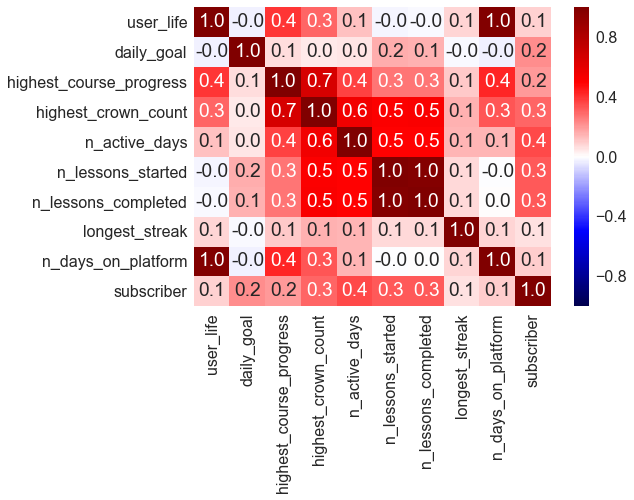

In [35]:
# # data with only continuous parameters
tmp = contin+['subscriber']
df_cont = df[tmp]
df_cont.dropna(subset=['highest_course_progress'],inplace=True)

# plot correlation map for continuous parameters
print("correlation: continuous parameters")
sns.set(font_scale=1.6)
a = sns.heatmap(data=df_cont.astype(float).corr(), cmap="seismic", annot=True,fmt='.1f')
plt.savefig("corr2.eps", bbox_inches='tight', dpi=600)
plt.show();

Drop some highly correlated usage/engagement parameters that contain missing values from further analysis:

In [36]:
df_model.drop('highest_crown_count',axis=1,inplace=True);
df_model.drop('highest_course_progress',axis=1,inplace=True);
df_model.drop('n_lessons_started',axis=1,inplace=True);
df_model.drop('n_lessons_completed',axis=1,inplace=True);
df_model.drop('future_contact',axis=1,inplace=True);
df.dropna(subset=['n_active_days'],inplace=True)

In [37]:
# function to plot confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=40)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=36)
    plt.yticks(tick_marks, classes, fontsize=36)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('True class', fontsize=40)
    plt.xlabel('Predicted class', fontsize=40)

    return plt

# Model training

### Important metric: recall
In accordance with the business goal, we want to identify more subscribers out of the true subscribers using our segmentation strategy. Therefore, we optimize the model using the recall score, and keep the precision above a reasonable threshold.

### Training data:
Data is split into training, validation, and test sets (6:2:2).

In [38]:
df_model2 = df_model.copy()

In [39]:
# split labeled data into training, validation, and test sets.
X_traintmp, X_test, y_traintmp, y_test = train_test_split(df_model2.drop('subscriber',axis=1), df_model2.subscriber, test_size=0.2, random_state=12)
X_train, X_val, y_train, y_val = train_test_split(X_traintmp,y_traintmp, test_size=0.2, random_state=11)

## Logistic regression classifier 
Motivation:

Since the business objective is to increase/identify subscribers, and the data provides such label, this objective based customer segmentation can be effectively done by classification. In addition, the existence of both numerical and categorical attributes make clustering challenging. Nevertheless, the aim of the classifier is to extract features that best describe each of the customer segments.

Logistic regression classifier serves well as a quick baseline model. If it performs well, we may move forward to tree based methods, which is suitable for objective based customer segmentation.

In [40]:
# train model and fit validation set
lrmodel = LogisticRegression(C=100000,random_state=108,solver='liblinear', 
                         multi_class='ovr')

l = lrmodel.fit(X_train, y_train)
y_predicted = lrmodel.predict(X_val)


# performance metrics
cm = confusion_matrix(y_val, y_predicted, labels = [1,0])
tp = cm[0][0]
fn = cm [0][1]
fp = cm [1][0]
tn = cm[1][1]
tot = (tp+fp+fn+tn)
acc = (tp+fp)/tot
precision = float(tp)/(tp+fp)
recall = float(tp)/(tp+fn)
f1 = 2*(precision*recall/(precision+recall))
print("logistic regression performance on validation set:\n")
print ("\nprecision= %4.2f, recall= %4.2f, f1= %4.2f, acc= %4.2f  "%(precision, recall,f1,acc),'\n')

logistic regression performance on validation set:


precision= 0.76, recall= 0.78, f1= 0.77, acc= 0.32   



logistic regression performance on test set:


precision= 0.76, recall= 0.78, f1= 0.77, acc= 0.35   



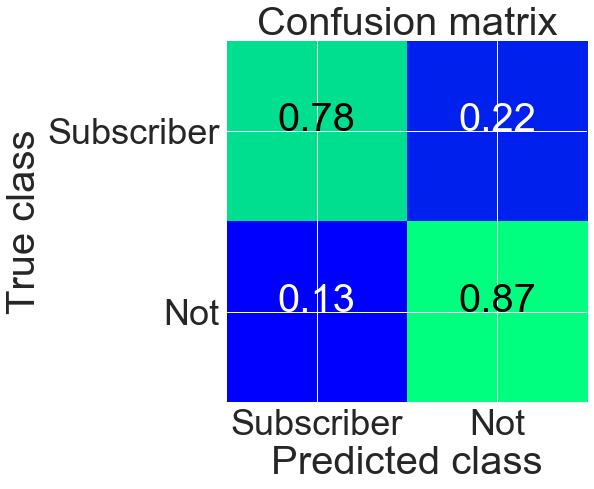

In [41]:
# apply trained model on test set
y_predicted = lrmodel.predict(X_test)


# performance metrics
cm = confusion_matrix(y_test, y_predicted, labels = [1,0])
tp = cm[0][0]
fn = cm [0][1]
fp = cm [1][0]
tn = cm[1][1]
tot = (tp+fp+fn+tn)
acc = (tp+fp)/tot
precision = float(tp)/(tp+fp)
recall = float(tp)/(tp+fn)
f1 = 2*(precision*recall/(precision+recall))

print("logistic regression performance on test set:\n")
print ("\nprecision= %4.2f, recall= %4.2f, f1= %4.2f, acc= %4.2f  "%(precision, recall,f1,acc),'\n')

# plot confusion matrix
f = plt.figure(figsize=(8, 8))
plot = plot_confusion_matrix(cm, classes=['Subscriber','Not'], normalize=True, title='Confusion matrix')
plt.show()

### Model performance
The logistic regression model achieves 0.78 recall score. After hyperparameter tuning on the validation set, regularization was set to 
nearly none. It was not needed likely because redundant features were dropped before modeling.

### Class imbalance
Despite the model's decent recall and precision score, from the confusion matrix, we can see the model's capability
in classifying non-subscribers are better than classifying subscribers. It is likely caused by data imbalance.
Non-subscribers are twice more than subscribers. 

Upsample subscribers to bridge data imbalance may improve the classifier.
Therefore, additional models are explored below with upsampled data.

## Up-sampling

In [42]:
import random

# upsample subscribers to match non-subscribers
df_model_s = resample(df_model2[df_model2.subscriber==1],
                 replace=True, # sample with replacement
                 n_samples=df_model2[df_model2.subscriber==0].shape[0], # match number in majority class
                 random_state=119) # reproducible results


df_model_n = df_model2[df_model2.subscriber==0]
df_model_up = pd.concat([df_model_s,df_model_n])
print ("total number of upsampled data entries:",df_model_up.shape[0])

df_model_f = df_model_up.copy()
del df_model_s,df_model_n,df_model_up

total number of upsampled data entries: 6990


## Logistic Regression Classifier + Upsampling

In [43]:
# split labeled data into training, validation, and test sets (0.6,0.2,0.2).
X_traintmp, X_test, y_traintmp, y_test = train_test_split(df_model_f.drop('subscriber',axis=1), df_model_f.subscriber, test_size=0.2, random_state=78)
X_train, X_val, y_train, y_val = train_test_split(X_traintmp,y_traintmp, test_size=0.2, random_state=49)

In [44]:
# train classifier and apply on validation set
lrmodel = LogisticRegression(C=1000000,random_state=108,solver='liblinear', 
                         multi_class='ovr')
l = lrmodel.fit(X_train, y_train)
y_predicted = lrmodel.predict(X_val)

# performance metrics
cm = confusion_matrix(y_val, y_predicted, labels = [1,0])
tp = cm[0][0]
fn = cm [0][1]
fp = cm [1][0]
tn = cm[1][1]
acc = (tp+fp)/tot
precision = float(tp)/(tp+fp)
recall = float(tp)/(tp+fn)
f1 = 2*(precision*recall/(precision+recall))
print("logistic regression performance on validation set:\n")
print ("\nprecision= %4.2f, recall= %4.2f, f1= %4.2f, acc= %4.2f  "%(precision, recall,f1,acc),'\n')

logistic regression performance on validation set:


precision= 0.80, recall= 0.90, f1= 0.85, acc= 0.58   



logistic regression performance on test set:


precision= 0.81, recall= 0.92, f1= 0.86, acc= 0.57   



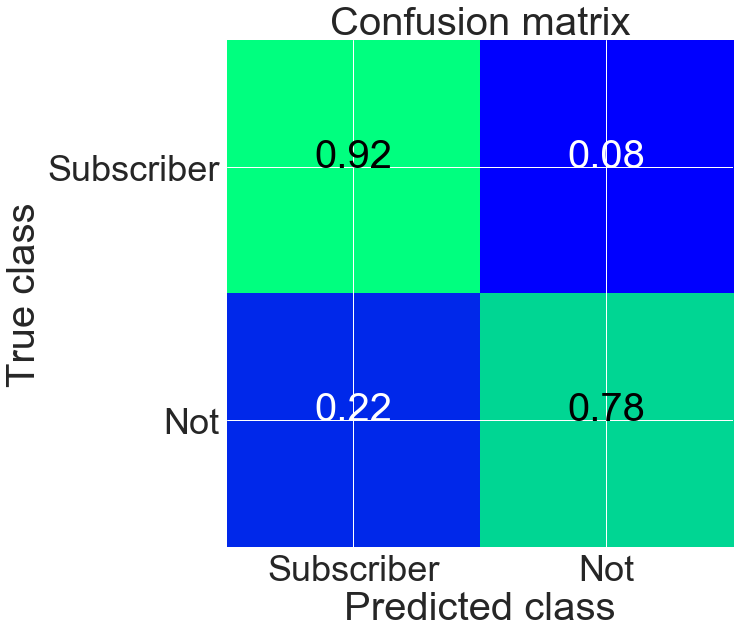

In [45]:
y_predicted = lrmodel.predict(X_test)

print("logistic regression performance on test set:\n")

cm = confusion_matrix(y_test, y_predicted, labels = [1,0])
tp = cm[0][0]
fn = cm [0][1]
fp = cm [1][0]
tn = cm[1][1]
tot = (tp+fp+fn+tn)
acc = (tp+fp)/tot
precision = float(tp)/(tp+fp)
recall = float(tp)/(tp+fn)
f1 = 2*(precision*recall/(precision+recall))
print ("\nprecision= %4.2f, recall= %4.2f, f1= %4.2f, acc= %4.2f  "%(precision, recall,f1,acc),'\n')

f = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Subscriber','Not'], normalize=True, title='Confusion matrix')
plt.savefig('x.png')
plt.show()

### We can see a great leap in recall score (0.78 -> 0.92) when the model is applied on upsampled data instead.
Nevertheless, the accuracy score is low largely due to a high false positive, the mis-classified non-subscribers. Since our purpose can be fulfilled by selecting out most of the subscribers, this is not a big concern.

### sidenote:
The classification threshold here is set at 0.5. Tuning the threshold can further optimize the recall and precision score if needed.

In [46]:
# get important features for each class
importances = lrmodel.coef_[0]
features = list(df_model2.drop('subscriber',axis=1).columns)
df_lr = pd.DataFrame({'importances':importances,'features':features})
df_lr_f = df_lr[df_lr.importances>0.]
df_lr_n = df_lr[df_lr.importances<0.]
df_lr_normal = df_lr_n.sort_values(by=['importances'],ascending=True)
df_lr_not = df_lr_f.sort_values(by=['importances'],ascending=False)

# display top features and discussion
print("**top features for subscribers:**")
print("in descending rank of importance")
df_lr_not.sort_values(by=['importances'],ascending=True).reset_index().drop(['index','importances'],axis=1).head(5)

print("\n\n**top features for non-subscribers:**")
print("in descending rank of importance")
df_lr_normal.sort_values(by=['importances'],ascending=True).reset_index().drop(['index','importances'],axis=1).head(5)
print("\nComment:\
      \nThe logistic regression classifier captures features in subscribers that have good correspondance with previous correlations analysis. Although\
      for non-subscribers it almost solely relies on countries that have much less subscribers than top 4 countries.")

**top features for subscribers:**
in descending rank of importance


,features
0,n_active_days
1,emp_Employed full-time
2,daily_goal
3,took_placement_test
4,age_75 or older




**top features for non-subscribers:**
in descending rank of importance


,features
0,country_TW
1,country_CO
2,country_DE
3,country_BR
4,country_US



Comment:      
The logistic regression classifier captures features in subscribers that have good correspondance with previous correlations analysis. Although      for non-subscribers it almost solely relies on countries that have much less subscribers than top 4 countries.


The baseline logistic regression model works well, so now we will to explore a tree-based method, which can use the Gini index to select good features for customer segmentation.

## Random Forest Classifier + Upsampling

In [47]:
# random forest classifier:
# manual coarse grid search + fine random search for hyperparameter tuning 
rfmodel = RandomForestClassifier(bootstrap= True,n_estimators=500,min_samples_leaf=3,min_samples_split=10,
                                 max_depth= 100,random_state=14,n_jobs=-1)

# training model
r = rfmodel.fit(X_train, y_train)

# apply model on validation set
y_predicted = rfmodel.predict(X_val)

# performance metrics
cm = confusion_matrix(y_val, y_predicted, labels = [1,0])
tp = cm[0][0]
fn = cm [0][1]
fp = cm [1][0]
tn = cm[1][1]
tot = (tp+fp+fn+tn)
acc = (tp+fp)/tot
precision = float(tp)/(tp+fp)
recall = float(tp)/(tp+fn)
f1 = 2*(precision*recall/(precision+recall))

print("random forest performance on validation set:\n")
print ("\nprecision= %4.2f, recall= %4.2f, f1= %4.2f, acc= %4.2f  "%(precision, recall,f1,acc),'\n')

random forest performance on validation set:


precision= 0.85, recall= 0.93, f1= 0.89, acc= 0.52   



AUC score:  0.99 



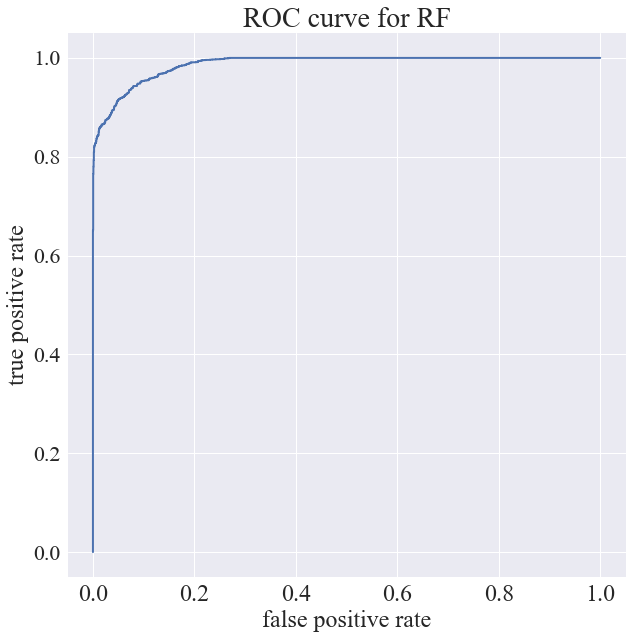

In [48]:
# apply model on test set
probabilities = (rfmodel.predict_proba(X_train))

# plot ROC curve
print ("AUC score: %5.2f"%roc_auc_score(y_train, probabilities[:, 1]),'\n')
fpr, tpr, threshold = metrics.roc_curve(y_train, probabilities[:, 1])
roc_auc = metrics.auc(fpr, tpr)
f = plt.figure(figsize=(10,10))
p = plt.plot(fpr, tpr,linewidth=2.0)
t = plt.title('ROC curve for RF',fontname = "Times New Roman",fontsize=28)
x = plt.xlabel('false positive rate',fontname = "Times New Roman",fontsize=24)
y = plt.ylabel('true positive rate',fontname = "Times New Roman",fontsize=24)
xi = plt.xticks(fontname = "Times New Roman",fontsize=24)  
yi = plt.yticks(fontname = "Times New Roman",fontsize=22)  

plt.show()

In [49]:
# get important features of the RF classifier
importances = rfmodel.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfmodel.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

df_rf = pd.DataFrame({'indices':indices, 'importance':importances[indices]})
features = list(df_model_f.drop('subscriber',axis=1).columns)
indices = list(df_rf.indices)

features_sorted = []
for ind in indices:
    features_sorted.append(features[ind])

df_rf['feature'] = features_sorted

print("**top features of the Random Forest classifier:**")
df_rf.drop(['importance','indices'],axis=1).head(10)
print("\nThe random forest classifier captures key features similar to those in logistic regression and correlation analysis.")

**top features of the Random Forest classifier:**


,feature
0,longest_streak
1,n_active_days
2,duolingo_usage
3,country_DE
4,country_GB
5,n_days_on_platform
6,daily_goal
7,country_US
8,country_RU
9,commitment



The random forest classifier captures key features similar to those in logistic regression and correlation analysis.


random forest performance on test set:


precision= 0.85, recall= 0.91  



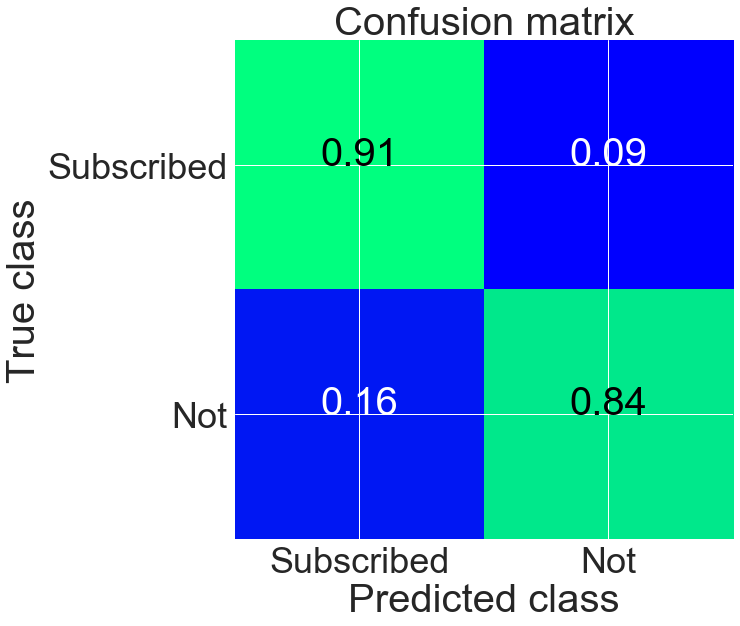

In [50]:
print("random forest performance on test set:\n")

y_predicted = rfmodel.predict(X_test)
cm = confusion_matrix(y_test, y_predicted, labels = [1,0])
tp = cm[0][0]
fn = cm [0][1]
fp = cm [1][0]
precision = float(tp)/(tp+fp)
recall = float(tp)/(tp+fn)
print ("\nprecision= %4.2f, recall= %4.2f "%(precision, recall),'\n')

f = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Subscribed','Not'], normalize=True, title='Confusion matrix')
plt.savefig('x.png')
plt.show()



## Random forest achieves a recall score 0.93, similar to logistic regression.
It also selects features that have good correspondance with correlation analysis.
Its strength compared to logistic regression lie in that it classifies non-subscribers much better 
(misclassification rate 22% -> 16%).


# Summary

• Correlation analysis brings a panoramic view of all key insights. Customers can be segmented by usage, social-economical status, platform, proficiency, country. Usage and social-economical status may be most important parameters in segmentation, but all above parameters bring good insights on product development and marketing strategy. <br>

• Supervised machine learning are used in place of unsupervised clustering. This data already provides the most key business objective - subscription, and it can be challenging to cluster on both numerical and categorical parameters simultaneously. <br>

• Logistic regression improves on upsampled data that solves class imbalance, by increasing recall score
from 0.78 to 0.92. In comparison, random forest performs equally well on recall score and have a higher precision.